# Init

## Utils

In [1]:
from contentScoreShareUtils import * 
VERSION = "v1.2"

# Data

## Load Data

### elo.contact (mcvisid_elqid_email)
- conclusion
    - every elqid should have a matched email. 
    - every elqid is corresponding with one Form. So, one visitor can have multiple elqid
    - not all the email can be found on CRM.Lead table
    - <font color=red>if shared EloquaContactId or EmailAddress = aggregate as one User (not handle yet)</font>
- Latest one month
    - <font color=red>all mcvisid in mcvisid_elqid_email are the positive signal: </font>
    - all other mcvisid not in mcvisid_elqid_email but in aem_raw is the negative signal: 
    
- mcvisid_elqid_email_all: no time range selection

<!-- WITH TMP1 AS (
SELECT DISTINCT [EloquaContactId], [mcvisid]
FROM [Staging].[aem].[RawTraffic]
WHERE EloquaContactId <> ''
), 

TMP2 AS (
SELECT DISTINCT  TMP1.[mcvisid], elq.EloquaContactId, LOWER(elq.[EmailAddress]) AS "EmailAddress"
FROM [Staging].[elq].[Contact] AS elq
INNER JOIN TMP1 ON TMP1.EloquaContactId = elq.EloquaContactId
WHERE elq.EloquaContactId <> ''
)

SELECT *
FROM TMP2 -->

- mcvisid_elqid_email_all: VisitStartDateTime > '2022-04-21'


<!-- WITH TMP1 AS (
SELECT DISTINCT [EloquaContactId], [mcvisid]
FROM [Staging].[aem].[RawTraffic]
WHERE EloquaContactId <> '' AND VisitStartDateTime > '2022-04-21'
), 

TMP2 AS (
SELECT DISTINCT  TMP1.[mcvisid], elq.EloquaContactId, LOWER(elq.[EmailAddress]) AS "EmailAddress"
FROM [Staging].[elq].[Contact] AS elq
INNER JOIN TMP1 ON TMP1.EloquaContactId = elq.EloquaContactId
WHERE elq.EloquaContactId <> ''
)

SELECT *
FROM TMP2 -->

In [2]:
email_mcvisid = pd.read_csv("mcvisid_elqid_email_all.csv")
email_mcvisid, drop_mcvisid = email_cleanup(email_mcvisid, "EmailAddress")

#### positive label 1
- if can find the elq contact ID, then treated as positive

In [3]:
positive_mcvisid = email_mcvisid["mcvisid"].drop_duplicates() ## all along the past, if mcvisid existed with corresponding elqid, then it is positive sigal

### crm Lead
- unique EloquaContactId -> do some update on this table for the same ID
- statuscodename: 
        ['New', 'Does not meet campaign criteria', 'Duplicate Lead', 'Already Active Opportunity', 'Insufficient information to contact', 'No buying intention', 'Not Decision Maker', 'Not buying or influence location', 'No Interest', 'Qualified', 'Unable to make contact (via phone,email)', 'No viable contact', 'Max Attempts', 'Unable to make contact', 'No RA solution', 'Assigned to Distribution', 'Bad Contact Information', 'Admin Only: Abandoned by Sales', 'Selling barrier to high', 'Not Buying Location', 'Unable to Process', 'Competitor/Non RA distributor', nan, 'Credit hold or watch', 'External Processing']
- statecodename: 
        ['Open', 'Disqualified', 'Qualified', nan]
- ra_generalengagementscore: 
        ['B4', nan, 'D4', 'A4', 'B1', 'B2', 'A2', 'D1', 'A1', 'A3', 'C2', 'C1', 'C4', 'B3', 'C3', 'D3', 'D2', '953810003.0']
- ra_salesacceptedname: 
        [nan, 'Yes', 'No']


In [135]:
_lead = pd.read_csv("crm_Lead_20221116_all.csv", index_col=0)
crm_lead, drop_rows = email_cleanup(_lead, "emailaddress1")
orders = [ 'emailaddress1', 'leadid', 'leadqualitycodename', 'ra_datetelequalified', 'statecodename', 'statuscodename', 'ra_teleaccepted', 'ra_teleacceptedname', 'ra_teledisqualifyreasonname', 'ra_telequalified',  'ra_telerejectionreasonname', 'ra_telerepname', 'ra_salesqualifiedname', 'ra_salesrejectionreasonname', 'qualifyingopportunityidname','ra_opportunitygroupname', 'ra_opportunityname', 'ra_opportunitytype', 'ra_opportunitytypename', 'ra_opportunityzone', 'ra_opportunityzonename', 'ra_salesaccepted', 'ra_salesacceptedname', 'ra_salesdisqualifyreason', 'ra_salesdisqualifyreasonname', 'modifiedby', 'modifiedbyname', 'modifiedon', 'createdby', 'createdbyname', 'createdon', 'leadqualitycode', 'statecode', 'statuscode', 
          'accountid', 'accountidname', 'address1_addressid', 'address1_addresstypecode', 'address1_addresstypecodename', 'address1_city', 'address1_country', 'ra_teledisqualifyreason', 'ra_telequalifiedname', 'ra_telerejectionreason', 'ra_telerep',  'address1_county', 'ra_salesqualified', 'ra_opportunitygroup', 'ra_salesrejectionreason',  'address1_fax', 'address1_latitude', 'address1_line1', 'address1_line2', 'address1_line3', 'address1_longitude', 'address1_name', 'address1_postalcode', 'address1_postofficebox', 'address1_shippingmethodcode', 'address1_shippingmethodcodename', 'address1_stateorprovince', 'address1_telephone1', 'address1_telephone2', 'address1_telephone3', 'address1_upszone', 'address1_utcoffset', 'address2_addressid', 'address2_addresstypecode', 'address2_addresstypecodename', 'address2_city', 'address2_country', 'address2_county', 'address2_fax', 'address2_latitude', 'address2_line1', 'address2_line2', 'address2_line3', 'address2_longitude', 'address2_name', 'address2_postalcode', 'address2_postofficebox', 'address2_shippingmethodcode', 'address2_shippingmethodcodename', 'address2_stateorprovince', 'address2_telephone1', 'address2_telephone2', 'address2_telephone3', 'address2_upszone', 'address2_utcoffset', 'budgetamount', 'budgetamount_base', 'budgetstatus', 'budgetstatusname', 'campaignid', 'campaignidname', 'companyname', 'confirminterest', 'confirminterestname', 'contactid', 'contactidname', 'createdonbehalfby', 'createdonbehalfbyname', 'customerid', 'ra_datesalesaccepted', 'ra_datesalesqualified', 'ra_dateteleaccepted', 'ra_dateteleassigned', 'customeridname', 'customeridtype', 'decisionmaker', 'decisionmakername', 'donotbulkemail', 'donotbulkemailname', 'donotemail', 'donotemailname', 'donotfax', 'donotfaxname', 'donotphone', 'donotphonename', 'donotpostalmail', 'donotpostalmailname', 'donotsendmarketingmaterialname', 'donotsendmm', 'emailaddress2', 'emailaddress3', 'estimatedamount', 'estimatedamount_base', 'estimatedclosedate', 'estimatedvalue', 'evaluatefit', 'evaluatefitname', 'exchangerate', 'fax', 'firstname', 'followemail', 'followemailname', 'fullname', 'importsequencenumber', 'industrycode', 'industrycodename', 'initialcommunication', 'initialcommunicationname', 'isautocreatename', 'isprivatename', 'jobtitle', 'lastname', 'lastonholdtime', 'lastusedincampaign', 'leadsourcecode', 'leadsourcecodename', 'masterid', 'masterleadidname', 'merged', 'mergedname', 'middlename', 'mobilephone', 'modifiedonbehalfby', 'modifiedonbehalfbyname', 'msdyn_gdproptout', 'msdyn_gdproptoutname', 'msdyn_leadgrade', 'msdyn_leadgradename', 'msdyn_leadkpiid', 'msdyn_leadkpiidname', 'msdyn_leadscore', 'msdyn_leadscoretrend', 'msdyn_leadscoretrendname', 'msdyn_predictivescoreid', 'msdyn_predictivescoreidname', 'msdyn_salesassignmentresult', 'msdyn_salesassignmentresultname', 'msdyn_segmentid', 'msdyn_segmentidname', 'need', 'needname', 'numberofemployees', 'onholdtime', 'originatingcaseid', 'originatingcaseidname', 'overriddencreatedon', 'ownerid', 'owneridname', 'owneridtype', 'owningbusinessunit', 'owningteam', 'owninguser', 'pager', 'parentaccountid', 'parentaccountidname', 'parentcontactid', 'parentcontactidname', 'participatesinworkflow', 'participatesinworkflowname', 'preferredcontactmethodcode', 'preferredcontactmethodcodename', 'prioritycode', 'prioritycodename', 'processid', 'purchaseprocess', 'purchaseprocessname', 'purchasetimeframe', 'purchasetimeframename', 'qualifyingopportunityid', 'ra_account', 'ra_accountname', 'ra_areyouengagedwithraoradistributor', 'ra_areyouengagedwithraoradistributorname', 'ra_blockreroutetodistributor', 'ra_blockreroutetodistributorname', 'ra_businessprocess', 'ra_businessprocessname', 'ra_channeltomarket', 'ra_channeltomarketname', 'ra_cnvcmpmostrecent', 'ra_cnvcmporiginal', 'ra_cnvdatemostrecentcmp', 'ra_cnvdatemostrecentsrc', 'ra_cnvdateoriginal', 'ra_cnvsrccmpidmostrecent', 'ra_cnvsrccmpidoriginal', 'ra_cnvsrcmostrecent', 'ra_cnvsrcoriginal', 'ra_contact', 'ra_contactname', 'ra_datasrccode', 'ra_datemodified', 'ra_demandsource', 'ra_demandsourcename', 'ra_emailwhoknowswhom', 'ra_funding', 'ra_fundingname', 'ra_generalengagementscore', 'ra_isthereanactiveneed', 'ra_isthereanactiveneedname', 'ra_ketplaysection', 'ra_ketplaysectionname', 'ra_keyplayurl', 'ra_leadacceptanceduedate', 'ra_leadlineitemcount', 'ra_leadqualificationduedate', 'ra_leadstage', 'ra_leadstagename', 'ra_ledby', 'ra_ledbyname', 'ra_legacyleadid', 'ra_lmpcontactapr', 'ra_lmpdateassigned', 'ra_lmpdateclosed', 'ra_lmpdatecreated', 'ra_lmpdatemodified', 'ra_lmplink', 'ra_lmpopportunityproduct', 'ra_lmpopportunitystatus', 'ra_lmpopportunityvalue', 'ra_lmpopportunityvalue_base', 'ra_lmpowneremail', 'ra_lmpstatus', 'ra_parentlead', 'ra_parentleadname', 'ra_primarycontactidentified', 'ra_primarycontactidentifiedname', 'ra_reroutetodistributor', 'ra_reroutetodistributorname', 'ra_salesplanid', 'ra_salesplanidname', 'ra_secondarysourcecampaign', 'ra_secondarysourcecampaignname', 'ra_specificationposition', 'ra_specificationpositionname', 'ra_stateprovinceid', 'ra_stateprovinceidname', 'ra_wasteleperformed', 'ra_wasteleperformedname', 'ra_wouldyoulikefurthercontact', 'ra_wouldyoulikefurthercontactname', 'ra_z_internal_preventloopingofaccount', 'ra_z_internal_preventloopingofaccountname', 'ra_zcurrenter', 'ra_zpreviouser', 'ra_zsalesacceptancestageentered', 'relatedobjectid', 'relatedobjectidname', 'revenue', 'revenue_base', 'salesstage', 'salesstagecode', 'salesstagecodename', 'salesstagename', 'salutation', 'schedulefollowup_prospect', 'schedulefollowup_qualify', 'sic', 'slaid', 'slainvokedid', 'slainvokedidname', 'slaname', 'stageid', 'subject', 'teamsfollowed', 'telephone1', 'telephone2', 'telephone3', 'timezoneruleversionnumber', 'transactioncurrencyid', 'transactioncurrencyidname', 'utcconversiontimezonecode', 'websiteurl', 'owningbusinessunitname', 'ra_integrationsource', 'ra_integrationsourcename', 'ra_externalrecordid', 'ra_externalreroute', 'ra_externalreroutename',]
crm_lead = crm_lead[orders].sort_values(by="modifiedon")

In [5]:
statecodename_positive_rules = {"Qualified": 1}
statuscodename_positive_rules = {"Already Active Opportunity": 1, "Assigned to Distribution":1}
crm_lead["statecode_signal"] = crm_lead["statecodename"].map(statecodename_positive_rules).fillna(0)
crm_lead["statuscode_signal"] = crm_lead["statuscodename"].map(statuscodename_positive_rules).fillna(0)

def label_assign_rules(x):
    target_cols = x[["statuscode_signal", "statecode_signal"]]
    is_positive = target_cols.sum().sum()>0 # one of them is positive
    return is_positive


email_updated_label = crm_lead.groupby("emailaddress1").apply(lambda x: label_assign_rules(x))
email_updated_label = email_updated_label.reset_index()
email_updated_label.columns = ["EmailAddress", "label"]

#### sample output

In [136]:
x = crm_lead[crm_lead["emailaddress1"] == "idy1983@163.com"]
x.to_excel("sample_lead-1.xlsx")
x = crm_lead[crm_lead["emailaddress1"] == "richard@modanz.com"]
x.to_excel("sample_lead-2.xlsx")


lead_size = crm_lead.groupby("emailaddress1").size()
a = lead_size[lead_size>10]
b = email_updated_label[email_updated_label["label"]==False]["EmailAddress"]
neg_sample_list = a[a.index.isin(b.drop_duplicates())].sort_values()

b = email_updated_label[email_updated_label["label"]==True]["EmailAddress"]
pos_sample_list = a[a.index.isin(b.drop_duplicates())].sort_values()

with pd.ExcelWriter('sample_lead.xlsx') as writer:

    x = crm_lead[crm_lead["emailaddress1"] == "jerry_li@lincolnelectric.com"]
    x.to_excel(writer, sheet_name="sample_lead-1-pos")
    x = crm_lead[crm_lead["emailaddress1"] == "pingpingzh@126.com"]
    x.to_excel(writer, sheet_name="sample_lead-2-pos")
    x = crm_lead[crm_lead["emailaddress1"] == "troy_jadro@virent.com"]
    x.to_excel(writer, sheet_name="sample_lead-1-neg")
    x = crm_lead[crm_lead["emailaddress1"] == "alovati@cosmopharma.com"]
    x.to_excel(writer, sheet_name="sample_lead-2-neg")


#### positive label 2
- if can find the elq contact ID, and rules are satisfied in CRM table, then treated as positive 
- rules diagram: https://app.diagrams.net/#G1cZkJWofiA_C-lV5Iqe0PBud0n3IuZVuT

In [6]:
print(email_updated_label["label"].value_counts())
email_updated_label.sample(10)

False    101227
True      33925
Name: label, dtype: int64


,EmailAddress,label
121093,svirost@slb.com,False
84495,mbosman@ball.com,False
94468,nschroeder@coopertire.com,False
65287,jorge.quintanilla@alliancellc.com,False
20340,carlos.perez@brp.com,False
34243,dodge.bard@auerprecision.com,True
32615,dguey@stanion.com,True
110215,ryan.agnew@teck.com,True
39651,erjohnson@semprautilities.com,False
114566,sergio.docampo@synthon.com,False


In [7]:
mcvisid_labels = email_mcvisid.merge(email_updated_label, on="EmailAddress", how="left")
mcvisid_labels["label"].fillna(False, inplace=True)
positive_mcvisid = mcvisid_labels[mcvisid_labels["label"] == True]["mcvisid"]
updated_labels = mcvisid_labels[["mcvisid","label"]].drop_duplicates()

#### correlation analysis

### AEM.raw 
```python
'SessionVisitorId', 'VisitPageNumber', 'VisitNumber', 'NewVisit',
'EventList', 'DateTime_UTC', 'PageURL', 'VisitReferrer',
'VisitReferrerType', 'VisitorDomain', 'External_Audience',
'External_AudienceSegment', 'External_Industry', 'External_Website',
'EloquaContactId', 'EloquaGUID', 'mcvisid', 'GeoCity', 'GeoCountry',
'GeoRegion', 'PDFurl', 'PDFpagecount', 'BingeId', 'BingeCriticalScore',
'BingeScoredAssetPath', 'BingeScoredAssetScore', 'date', 'hour',
'clean_PageURL', 'label'
```

In [8]:
usecols = [
    "mcvisid", "clean_PageURL", "label", "PDFurl", "BingeScoredAssetPath", "BingeId", "date", "hour",
    "VisitReferrer", "VisitorDomain", 'External_Audience',
    'External_AudienceSegment', 'External_Industry', 'External_Website',
    "EloquaContactId", "PageURL"
]

In [9]:
# aem_raw = load_csv_batches(glob_pattern="./aem_raw/*.csv", num=2, keep="last") 
aem_raw = pd.read_csv(f"stage1_raw_{VERSION}.csv", nrows=None, usecols=usecols)

In [10]:
view3 = aem_raw.groupby("clean_PageURL")["mcvisid"].count().rename("page_visit_count").to_frame()
view3.sort_values(by="page_visit_count")

,page_visit_count
clean_PageURL,
https://www.rockwellautomation.com/products/details.440T-MSTUE11BA,1
https://www.rockwellautomation.com/products/details.800A-C2CR10,1
https://www.rockwellautomation.com/products/details.800A-C2CR0LC,1
https://www.rockwellautomation.com/products/details.800A-C2CR0L,1
https://www.rockwellautomation.com/products/details.800A-C2CR06,1
...,...
https://www.rockwellautomation.com/support,232691
https://www.rockwellautomation.com/products/hardware/allen-bradley,677975
https://www.rockwellautomation.com/lang-selection,1404213


In [11]:
stopwords = view3[view3["page_visit_count"]>100000].sort_values("page_visit_count") # stopwords
stopwords

,page_visit_count
clean_PageURL,
https://www.rockwellautomation.com/company/events/in-person-events/automation-fair,108723
https://www.rockwellautomation.com/products/software/factorytalk,116044
https://www.rockwellautomation.com/sales,124975
https://www.rockwellautomation.com/products/hardware/allen-bradley/programmable-controllers,135873
https://www.rockwellautomation.com/support/product/product-compatibility-migration/product-lifecycle-status,155410
https://www.rockwellautomation.com/support/documentation/literature-library,155754
https://www.rockwellautomation.com/products,156632
https://www.rockwellautomation.com/company/about-us,165237
https://www.rockwellautomation.com/support/product/product-downloads,175463


In [12]:
view4 = view3[(view3["page_visit_count"]>10) & (view3["page_visit_count"]<100000)]
view4["page_visit_count"].describe()

count    19555.000000
mean       364.217489
std       2365.259183
min         11.000000
25%         17.000000
50%         33.000000
75%        100.000000
max      87730.000000
Name: page_visit_count, dtype: float64

In [13]:
stage1_raw = aem_raw.drop(columns=["label"]).merge(updated_labels, on="mcvisid", how="left")
print(stage1_raw["label"].fillna("nan").value_counts())
# stage1_raw["label"] = stage1_raw["label"].fillna(False)
stage1_raw.dropna(subset=["label"], inplace=True)
print(stage1_raw["label"].fillna("nan").value_counts())
stage1_raw.to_csv("model_input_EDA" + "_"+VERSION)
stage1_raw = stage1_raw[~stage1_raw["clean_PageURL"].isin(stopwords.index)] ## drop stopwords
print("after drop high freq website:\n", stage1_raw["label"].fillna("nan").value_counts())

nan      11660898
False     2894384
True       195647
Name: label, dtype: int64
False    2894384
True      195647
Name: label, dtype: int64
after drop high freq website:
 False    1521307
True      104551
Name: label, dtype: int64


## Summary
positive_mcvisid is all the valid mcvisid that has elqID in AEM Raw

### unique version

In [14]:
aem_raw_unique_mcvisid = stage1_raw["mcvisid"].drop_duplicates()
labels = aem_raw_unique_mcvisid.isin(positive_mcvisid)
freq = labels.value_counts()
view_mcvisid = pd.concat([freq,freq/freq.sum()], axis=1)
view_mcvisid

,mcvisid,mcvisid
False,122861,0.950988
True,6332,0.049012


### non-unique version

In [15]:
labels = stage1_raw["mcvisid"].isin(positive_mcvisid)
freq = labels.value_counts()
view_mcvisid = pd.concat([freq,freq/freq.sum()], axis=1)
view_mcvisid

,mcvisid,mcvisid
False,1512484,0.930268
True,113374,0.069732


### page conversion ratio

In [137]:
total = stage1_raw.groupby("clean_PageURL").size().rename("total")
pos = stage1_raw.groupby("clean_PageURL")["label"].sum().rename("positive") * 1
aa = pd.concat([total, pos], axis=1)
aa["ratio"] = aa["positive"]/aa["total"]
aa["negative"] = (aa["total"] - aa["positive"])*1

In [138]:
aa[(aa["total"]>100) & (aa["ratio"]>0.05)].sort_values("ratio")

,total,positive,ratio,negative
clean_PageURL,,,,
https://www.rockwellautomation.com/products/hardware/allen-bradley/network-security-and-infrastructure/controlnet-networks,439,22,0.050114,417
https://www.rockwellautomation.com/products/details.5069-IB16,419,21,0.050119,398
https://www.rockwellautomation.com/products/details.1783-LMS8,558,28,0.050179,530
https://www.rockwellautomation.com/products/hardware/allen-bradley/energy-monitoring/1426-powermonitor-5000,1076,54,0.050186,1022
https://www.rockwellautomation.com/products/software/factorytalk/designsuite,2409,121,0.050228,2288
...,...,...,...,...
https://www.rockwellautomation.com/company/events/webinars/networks-security-epc,120,25,0.208333,95
https://www.rockwellautomation.com/content/rockwell-automation/www/us/company/events/in-person-events/automation-fair/attend,214,48,0.224299,166
https://www.rockwellautomation.com/support/documentation/technical/independent-cart-technology/magnemover-lite,151,34,0.225166,117


In [139]:
url_maps[url_maps["clean_PageURL"] == "https://www.rockwellautomation.com/en-nz"]

,clean_PageURL,PageURL


In [74]:
url_maps.drop_duplicates().to_csv("url_maps_"+VERSION+".csv")

In [81]:
url_maps.sample(50).style

,clean_PageURL,PageURL
11368406,https://www.rockwellautomation.com/products/details.800TC-H33A2,https://www.rockwellautomation.com/en-us/products/details.800TC-H33A2.html
5389982,https://www.rockwellautomation.com/products/details.1783-US08T,https://www.rockwellautomation.com/es-mx/products/details.1783-US08T.html
873051,https://www.rockwellautomation.com/products/software/factorytalk/innovationsuite/analytics,https://www.rockwellautomation.com/es-mx/products/software/factorytalk/innovationsuite/analytics.html
6041745,https://www.rockwellautomation.com/capabilities/process-solutions/process-systems/plantpax-distributed-control-system/what-to-expect-from-plantpax-modern-dcs-playlist,https://www.rockwellautomation.com/en-mde/capabilities/process-solutions/process-systems/plantpax-distributed-control-system/what-to-expect-from-plantpax-modern-dcs-playlist.html
2622347,https://www.rockwellautomation.com/products/details.700-HLT1U1-EX,https://www.rockwellautomation.com/es-mx/products/details.700-HLT1U1-EX.html
13540129,https://www.rockwellautomation.com/products/details.700-HAX2A24,https://www.rockwellautomation.com/en-us/products/details.700-HAX2A24.html
3587654,https://www.rockwellautomation.com/products/details.856T-BTR3,https://www.rockwellautomation.com/es-ar/products/details.856T-BTR3.html
1010063,https://www.rockwellautomation.com/products/hardware/allen-bradley/energy-monitoring/1411-current-transformers,https://www.rockwellautomation.com/ja-jp/products/hardware/allen-bradley/energy-monitoring/1411-current-transformers.html
5446759,https://www.rockwellautomation.com/products/details.100-K12KF400M,https://www.rockwellautomation.com/en-us/products/details.100-K12KF400M.html
10241302,https://www.rockwellautomation.com/products/details.150-C251NBR,https://www.rockwellautomation.com/en-us/products/details.150-C251NBR.html


#### regex checking with missing url

In [140]:
result_list = """|/company/news/presentations/event_materials_page.html                                                                       |   125 |    125 |    0 | 1.0000 |
|/company/news/magazines/beat-the-heat-when-mounting-low-voltage-ac-drives.html                                              |   106 |    100 |    0 | 0.9434 |
|/company/events/in-person-events/partnernetwork-conf-kr.html                                                                |   155 |    129 |    0 | 0.8323 |
|/company/events/webinars/functional-safety-techconnect.html                                                                 |   103 |     80 |    0 | 0.7767 |
|/company/events/in-person-events/archive.html                                                                               |   146 |    113 |    0 | 0.7740 |
|/company/events/webinars/webinaire-process-dcs-plantpax.html                                                                |   148 |    113 |    0 | 0.7635 |
|/company/events/webinars/modernising-to-smart-connected-systems.html                                                        |   163 |    124 |    0 | 0.7607 |
|/campaigns/thank-you-smart-downloads.html                                                                                   |   129 |     98 |    0 | 0.7597 |
|/company/events/webinars/product-registration.html                                                                          |   218 |    163 |    0 | 0.7477 |
|/campaigns/emea/en/company/events/webinars/tech-talks/hms-claroty-stratus.html                                              |   202 |    151 |    0 | 0.7475 |
|/company/events/webinars/techconnect-genius-webinar--subscription-portal-overview-session2.html                             |  1447 |   1057 |    0 | 0.7305 |
|/company/events/webinars/404.html                                                                                           |   151 |    109 |    0 | 0.7219 |
|/campaigns/emea/en/company/events/webinars/technical-competency-updates/unleash-the-new-capabilities-of-edge-analytics.html |   372 |    266 |    0 | 0.7151 |
|/en-mde/products/hardware/allen-bradley/drives.html                                                                         |   101 |     72 |    0 | 0.7129 |
|/support/product/product-selection-configuration/global-short-circuit-current-ratings-tool.html                             |  7015 |   4995 |    0 | 0.7120 |
|/company/events/in-person-events/partnernetwork-conference.html                                                             |   245 |    174 |    0 | 0.7102 |
|/industries/chemical/vfd-energy-savings-calculator.html                                                                     |   215 |    152 |    0 | 0.7070 |
|/company/news/column/executive_news_japan.html                                                                              |   112 |     79 |    0 | 0.7054 |
|/en-mde/support/product/product-compatibility-migration/product-lifecycle-status.html                                       |   280 |    196 |    0 | 0.7000 |
|/campaigns/emea/en/company/events/webinars/tech-talks/cisco-prosoft-spectrum-controls.html                                  |   120 |     84 |    0 | 0.7000 |
|/company/events/webinars/micro-control-integrated-automation-solution.html                                                  |   280 |    194 |    0 | 0.6929 |
|/company/events/webinars/protect-your-gigafactory-with-industrial-security.html                                             |   169 |    116 |    0 | 0.6864 |
|/support/documentation/technical-data/proposalworkssuppleme20180213-1403.html                                               |   114 |     78 |    0 | 0.6842 |
|/company/events/webinars/technology-partner-genius-webinar-with-prosoft-technology---conn.html                              |   114 |     78 |    0 | 0.6842 |
|/support/documentation/technical-data/proposalworksaddinghe20180213-1349.html                                               |   104 |     71 |    0 | 0.6827 |
|/company/events/in-person-events/roklive/emea/faq.html                                                                      |   321 |    219 |    0 | 0.6822 |
|/company/events/webinars/technology-partner-genius-webinar-with-oden-technologies.html                                      |   796 |    542 |    0 | 0.6809 |
|/company/news/blogs/single-use-system-lifesciences-pt2.html                                                                 |   102 |     69 |    0 | 0.6765 |
|/company/news/demonstrations/safety-automation-builder-software-demonstration.html                                          |   307 |    207 |    0 | 0.6743 |
|/company/news/blogs/from-automation-to-autonomy.html                                                                        |   153 |    103 |    0 | 0.6732 |"""

In [141]:
xx = "detail"
result_check = pd.DataFrame([[item.strip() for item in row.split("|") if len(item)>1 ]for row in result_list.split("\n") ], columns=["clean_PageURL", "total", "eloqua","crm", "ratio"])
# stage1_raw[stage1_raw["PageURL"].str.contains(xx)][["clean_PageURL", "PageURL"]].drop_duplicates().head(50).style
clean_urls = stage1_raw["clean_PageURL"].drop_duplicates()
all_urls = stage1_raw["PageURL"].drop_duplicates()
for row in result_check["clean_PageURL"].tolist():
    a = clean_urls.str.contains(xx).any()
    b = all_urls.str.contains(xx).any()
    if a is False or b is False:
        print(row)
        
result_check["clean_PageURL"] = result_check["clean_PageURL"].apply(lambda x: "https://www.rockwellautomation.com" + x[:-5])
# result_check.style

In [142]:
result_wei = aa.reset_index().sort_values(by="ratio")
result_wei.describe()
# result_wei[(result_wei["total"]>50) & (result_wei["ratio"]>0.05)].tail(50)

,total
count,40030.000000
mean,40.615988
std,418.950375
min,1.000000
25%,1.000000
50%,2.000000
75%,6.000000
max,22026.000000


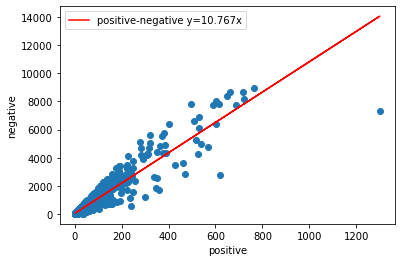

,total
count,1564.000000
mean,576.402813
std,1147.173750
min,51.000000
25%,85.000000
50%,188.000000
75%,504.000000
max,9706.000000


In [143]:
from sklearn.linear_model import LinearRegression
plot_data = result_wei.query("10000>`total`>50 and `ratio`>0.05")
# [(result_wei["freq"]>50)  & (result_wei["ratio"]>0.05)]
x = plot_data["positive"].values.reshape(-1,1)
y = plot_data["negative"].values.reshape(-1,1)
linear_regressor = LinearRegression()
linear_regressor.fit(x, y)
y_pred = linear_regressor.predict(x)

plt.scatter(x, y)
plt.xlabel("positive")
plt.ylabel("negative")
plt.plot(x, y_pred, color='red', label=f'positive-negative y={round(linear_regressor.coef_[0][0],4)}x')
# plt.plot([0,10000],[0,10000], color='blue', label="y=x")
plt.legend()
plt.show()
plot_data.describe()

In [150]:
result_wei.sort_values(by="ratio", ascending=False).to_csv(f"result_wei_{VERSION}.csv")

In [145]:
# cc = result_wei[result_wei["clean_PageURL"].str.contains(".pdf")]
# cc[cc["total"]>2].sort_values(["ratio"], ascending=False).style
result_wei

,clean_PageURL,total,positive,ratio,negative
0,https://www.rockwellautomation.com-ch/products,1,0,0.0,1
25167,https://www.rockwellautomation.com/products/de...,2,0,0.0,2
25166,https://www.rockwellautomation.com/products/de...,1,0,0.0,1
25165,https://www.rockwellautomation.com/products/de...,1,0,0.0,1
25164,https://www.rockwellautomation.com/products/de...,5,0,0.0,5
...,...,...,...,...,...
29402,https://www.rockwellautomation.com/products/de...,2,2,1.0,0
31166,https://www.rockwellautomation.com/products/de...,1,1,1.0,0
7282,https://www.rockwellautomation.com/products/de...,1,1,1.0,0
20408,https://www.rockwellautomation.com/products/de...,1,1,1.0,0


In [83]:
comparison = result_wei.merge(result_check, on="clean_PageURL", suffixes=["_wei", "_inkoo"], how="right")
comparison.style

,clean_PageURL,total_wei,positive,ratio_wei,negative,total_inkoo,eloqua,crm,ratio_inkoo
0,https://www.rockwellautomation.com/company/news/presentations/event_materials_page,nan,nan,nan,nan,125,125,0,1.0000
1,https://www.rockwellautomation.com/company/news/magazines/beat-the-heat-when-mounting-low-voltage-ac-drives,2.000000,0,0.000000,2,106,100,0,0.9434
2,https://www.rockwellautomation.com/company/events/in-person-events/partnernetwork-conf-kr,72.000000,13,0.180556,59,155,129,0,0.8323
3,https://www.rockwellautomation.com/company/events/webinars/functional-safety-techconnect,64.000000,7,0.109375,57,103,80,0,0.7767
4,https://www.rockwellautomation.com/company/events/in-person-events/archive,14.000000,0,0.000000,14,146,113,0,0.7740
5,https://www.rockwellautomation.com/company/events/webinars/webinaire-process-dcs-plantpax,17.000000,3,0.176471,14,148,113,0,0.7635
6,https://www.rockwellautomation.com/company/events/webinars/modernising-to-smart-connected-systems,13.000000,3,0.230769,10,163,124,0,0.7607
7,https://www.rockwellautomation.com/campaigns/thank-you-smart-downloads,6.000000,1,0.166667,5,129,98,0,0.7597
8,https://www.rockwellautomation.com/company/events/webinars/product-registration,86.000000,2,0.023256,84,218,163,0,0.7477
9,https://www.rockwellautomation.com/campaigns/emea/en/company/events/webinars/tech-talks/hms-claroty-stratus,nan,nan,nan,nan,202,151,0,0.7475


In [28]:
# aem_raw[aem_raw["PageURL"]=="https://www.rockwellautomation.com/company/news/presentations/event_materials_page"]

#### URL checking

In [29]:
url_maps = stage1_raw[["clean_PageURL", "PageURL"]].drop_duplicates()

In [30]:
# b = aa.reset_index()
# c = b[b["clean_PageURL"].str.contains("emea")]
# c[(c["total"]>100) & (c["ratio"]>0.05)].head(40).style

In [31]:
# url_maps[url_maps["clean_PageURL"].str.contains("emea")].head().style

In [32]:
# url_idf = pd.DataFrame([vectorizer.get_feature_names(), vectorizer.idf_.tolist()]).T
# url_idf.columns = ["url", "idf"]
# with_idf = b.reset_index().merge(url_idf, left_on="clean_PageURL", right_on="url", how="left")
# with_idf.sort_values(by="idf")

# Feature Engineering


## Preprocessing - TF-IDF (NLP)

- TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)
    - idf(t) = log(N/(df + 1))
<!--         <img src="https://cdn-media-1.freecodecamp.org/images/1*q3qYevXqQOjJf6Pwdlx8Mw.png" width="300"/> -->
<!--         <img src="https://preview.redd.it/clwuxvtqpeq91.png?width=397&format=png&auto=webp&s=ae6788cefae9b83b3033db3612ec83e8f5ded24f" width="300"/> -->
    - rather directly using count frequency in the naive bayesian, using TF-IDF to adjust the features
    
- preprocessing.StandardScaler()
    - should not use because the features importance are dependent on the frequency, which is already kind of information

## stage1: wrapping data
- label: Submitted gated form (target)
    - generated by EventList
- features:
    - choosed:
        - BingeScoredAssetPath: Current BingeScoredAssetPath interaction on one session ( content sequence )
        - DateTime_UTC -> for concat sequence in visited order
    - possible:
        - BingeScoredAssetScore = manually set -> importance level for sales people
        - BingeCriticalScore = manually threshold -> initial threshold for sales people
        - PageURL? what information this URL can bring into model?
        
- original asset score manual setup ideas:
    - asset weight average is 1, if it is more important/meaningful -> bump up to 2;
    - if there are 5 assets in total, then default basic threshold is 5

In [33]:
SEP_TOKEN_PATTERN = "[^\$]+"
SEED = 42
TEST_SIZE = 0.2

# Modeling



## Stage-1: Scoring content - visitor preference 
- rethink:
    - what is the most attractive content for visitor v.s. what is the most attractive content for salespeople?
        - SubmitGatedForm action is not marked by sales people, it's kind of inclination level from user side
        - the model is trying to know which asset is more important for SubmitGatedForm 
        - how important for user to submit GCDC

    - weight should be from sales people definition, but current method can only get the attractive score on visitor aspect => 
        - assumption-1: more clicks => interesting to connect? <font color=red>submit GCDC == made a reach out decision? YES?</font>
        - they will think the information are valuable for them, want to get more related information -> salespeople reach out? When is the time = threshold?

In [34]:
# def page_journey_aggregation(user_journey, sep="$"):
#     label = user_journey["label"].unique()
#     assert len(label) == 1
#     y = label[0]
            
#     page_view = sep.join(user_journey.sort_values(by="DateTime_UTC")["clean_PageURL"].tolist())
#     return pd.Series([page_view, y], index=["features", "label"])

# data = stage1_raw.groupby("mcvisid").progress_apply(lambda x: page_journey_aggregation(x))

In [35]:
# y_sum = stage1_raw.groupby("mcvisid")["label"].sum()
# y_size = stage1_raw.groupby("mcvisid")["label"].size()
# y_validation = pd.concat([y_size, y_sum], axis=1)
# y_validation.columns=["y_size","y_sum"]
# y_pos = y_validation[y_validation["y_sum"]>0]
# y_pos[y_pos["y_size"] != y_pos["y_sum"]]# should be unique zero

In [36]:
# stage1_raw[stage1_raw["mcvisid"] == "00000092262929664423777026703889338013"]

In [37]:
X = stage1_raw.sort_values(by=["date","hour"]).groupby("mcvisid").progress_apply(lambda x: "$".join(x["clean_PageURL"]))
y = stage1_raw.groupby("mcvisid")["label"].sum()>0

100%|████████████████████████████████| 129193/129193 [00:04<00:00, 29629.98it/s]


### minium visit frequency data viewer
- at least valid five visit

In [38]:
stage1_raw.to_csv(f"tableau_eda_{VERSION}.csv")

In [39]:
fts = pd.DataFrame()
unique_fts = pd.DataFrame()
visit_freq = stage1_raw.groupby("mcvisid").size().sort_values()
for mini_records in tqdm(range(1,15)):
    target_visit = visit_freq[visit_freq>=mini_records]
    target_raw = stage1_raw[stage1_raw["mcvisid"].isin(target_visit.index)]
    ft = target_raw["label"].value_counts().rename(f"min{mini_records}").to_frame().T
    unique_ft = target_raw[["mcvisid","label"]].drop_duplicates()["label"].value_counts().rename(f"u-min{mini_records}").to_frame().T
    fts = pd.concat([fts, ft])
    unique_fts = pd.concat([unique_ft,unique_fts])


100%|███████████████████████████████████████████| 14/14 [00:11<00:00,  1.22it/s]


In [40]:
# unique_fts
unique_fts = unique_fts.sort_values(by=1, ascending=False)

,False,True,ratio
u-min1,123280,6332,19.469362
u-min2,102884,5626,18.287238
u-min3,87106,5000,17.421200
u-min4,75145,4542,16.544474
u-min5,65642,4105,15.990743
u-min6,58028,3776,15.367585
u-min7,51860,3459,14.992772
u-min8,46657,3232,14.435953
u-min9,42381,3004,14.108189
u-min10,38772,2816,13.768466


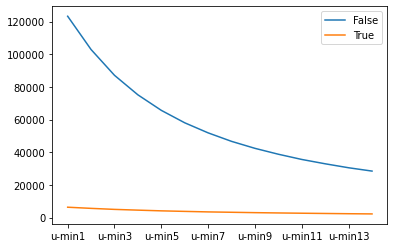

In [41]:
unique_fts.plot()
unique_fts["ratio"] = unique_fts[0]/unique_fts[1]
unique_fts

,False,True,ratio
min1,1521307,104551,14.550860
min2,1500911,103845,14.453378
min3,1469384,102622,14.318411
min4,1433501,101248,14.158314
min5,1395553,99564,14.016643
min6,1357483,97919,13.863326
min7,1320568,96110,13.740173
min8,1284147,94521,13.585838
min9,1250007,92765,13.474985
min10,1217526,91073,13.368682


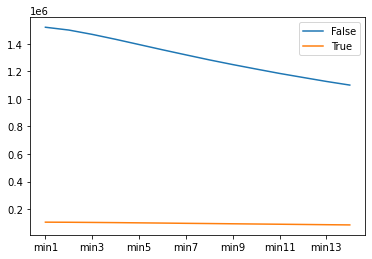

In [42]:
fts.plot()
fts["ratio"] = fts[0]/fts[1]
fts

In [43]:
target_visit = visit_freq[(visit_freq>=5)]
target_raw = stage1_raw[stage1_raw["mcvisid"].isin(target_visit.index)]

In [44]:
X = target_raw.sort_values(by=["date","hour"]).groupby("mcvisid").progress_apply(lambda x: "$".join(x["clean_PageURL"]))
y = target_raw.groupby("mcvisid")["label"].sum()>0

100%|██████████████████████████████████| 69389/69389 [00:02<00:00, 29870.18it/s]


In [45]:
# target_pageurls = target_raw[["PageURL", "clean_PageURL"]].drop_duplicates()

In [46]:
data = pd.concat([X, y], axis=1)
data.columns = ["features", "label"]

### increase threshold
# data = data.loc[target_visit.index]
# print("reduce rows:", X.shape[0] - data.shape[0], "from ", X.shape[0], "keep rows: ", data.shape[0])

In [47]:
# data["features"].drop_duplicates()

In [48]:
# aa = data.groupby("features", group_keys=False).size().sort_values() # 检查是否有 同样数据 但是不同的 label 的数据
# aa.to_frame().tail(40).style

### Data split + TFIDF
<!-- 
# ## outdated
# data = stage1_raw.groupby("SessionVisitorId").apply(lambda x: processing_stage1(x, target_method=1, feature_method="bow"))
# data["submitted_form"].value_counts()

# def tfidf_transform(dtm, idf=None):
#     N = dtm.shape[0] # number of document
#     tf = (dtm/(dtm.sum(axis=1).reshape(-1,1)))

#     if idf is None:
#         idf = np.log(1 + N/(dtm.astype(bool).sum(axis=0)))
        
#     tfidf = tf * idf
#     return tfidf, idf
# v = DictVectorizer(sparse=False)
# X_train_dtm = v.fit_transform(X_train)
# X_test_dtm = v.transform(X_test)
# X_train_arr, idf = tfidf_transform(X_train_dtm)
# X_test_arr, _ = tfidf_transform(X_test_dtm, idf) -->

In [49]:
samples_checking = data[data["features"].transform(len)<5000]
seeds= 10
samples_30 = samples_checking.assign(features_seq = samples_checking["features"].transform(lambda x: x.split("$"))).sample(30, random_state=seeds)
samples_30[["features_seq", "label"]].style

,features_seq,label
mcvisid,,
36865645799817340933860350092266427854,"['https://www.rockwellautomation.com/products/hardware/allen-bradley/network-security-and-infrastructure/devicenet-networks', 'https://www.rockwellautomation.com/products/hardware/allen-bradley/motor-control/low-voltage-starters/armorstart-distributed-motor-controllers', 'https://www.rockwellautomation.com/products/hardware/allen-bradley/motor-control/low-voltage-starters/armorstart-distributed-motor-controllers', 'https://www.rockwellautomation.com/products/hardware/allen-bradley/motor-control/low-voltage-starters/armorstart-distributed-motor-controllers', 'https://www.rockwellautomation.com/products/details.1791ES-IB16']",False
31681164737141278610068565336580780041,"['https://www.rockwellautomation.com/products/software/factorytalk/designsuite/studio-5000', 'https://www.rockwellautomation.com/capabilities/software-ordering-options', 'https://www.rockwellautomation.com/products/software/factorytalk/designsuite/studio-5000/studio-5000-logix-designer', 'https://www.rockwellautomation.com/support/documentation/overview/studio-5000-design-environment-overview', 'https://www.rockwellautomation.com/products/software/factorytalk/designsuite/studio-5000/studio-5000-logix-designer', 'https://www.rockwellautomation.com/products/software/factorytalk/designsuite/studio-5000/studio-5000-logix-designer', 'https://www.rockwellautomation.com/products/software/factorytalk/designsuite/studio-5000', 'https://www.rockwellautomation.com/capabilities/software-ordering-options', 'https://www.rockwellautomation.com/products/software/factorytalk/designsuite/studio-5000/studio-5000-logix-designer', 'https://www.rockwellautomation.com/products/software/factorytalk/designsuite/studio-5000', 'https://www.rockwellautomation.com/tools/software-subscriptions-updated', 'https://www.rockwellautomation.com/capabilities/epc', 'https://www.rockwellautomation.com/rockwellautomation/support/activations']",False
27514056952888852442679816754433789997,"['https://www.rockwellautomation.com/tools/software-subscriptions-updated', 'https://www.rockwellautomation.com/partner', 'https://www.rockwellautomation.com/capabilities/industrial-automation-control/design-and-configuration-software', 'https://www.rockwellautomation.com/products/hardware/allen-bradley/programmable-controllers/micro-controllers/micro800-family/micro870-controllers', 'https://www.rockwellautomation.com/capabilities/industrial-automation-control/design-and-configuration-software']",False
27904156301782694273677843385962253389,"['https://www.rockwellautomation.com/products/details.1756-L82E', 'https://www.rockwellautomation.com/products/details.1756-L72', 'https://www.rockwellautomation.com/products/details.1756-L82E', 'https://www.rockwellautomation.com/products/hardware/allen-bradley/industrial-computers-monitors/thin-clients', 'https://www.rockwellautomation.com/products/hardware/allen-bradley/industrial-computers-monitors/thin-clients/6300t-box-thin-client']",False
80218428201543401074504367661198922647,"['https://www.rockwellautomation.com/products/details.5069-L310ER-NSE', 'https://www.rockwellautomation.com/company/events/in-person-events/roklive-2022-sydney---get-inspired-to-innovate-', 'https://www.rockwellautomation.com/company/events/in-person-events/roklive-2022-sydney---get-inspired-to-innovate-', 'https://www.rockwellautomation.com/company/events/in-person-events/roklive-2022-sydney---get-inspired-to-innovate-', 'https://www.rockwellautomation.com/products/hardware/allen-bradley/i-o/chassis-based-i-o/5069-compact-i-o', 'https://www.rockwellautomation.com/products/hardware/allen-bradley/i-o/chassis-based-i-o/5069-compact-i-o', 'https://www.rockwellautomation.com/support/product/product-downloads/application-code-library/sample-code', 'https://www.rockwellautomation.com/products/hardware/allen-bradley/i-o/chassis-based-i-o/5069-compact-i-o', 'https://www.rockwellautomation.com/products/hardware/allen-bradley/i-o/chassis-b

In [50]:
print("pos vs neg in training set:",  Counter(data["label"]))
X_train, X_test, y_train, y_test = train_test_split(data["features"], data["label"], test_size=TEST_SIZE, stratify=data["label"].values, random_state=SEED)
print("training sample label proportion:", Counter(y_train))
print("testing sample label proportion:", Counter(y_test))

## down-sampling/up-sampling
data_train = pd.concat([X_train, y_train], axis=1)
# pos_size = y_train.sum()
# data_train = data_train.groupby('label', group_keys=False).apply(lambda x: x.sample(pos_size, replace=False))
neg_size = (~y_train).sum()
data_train = data_train.groupby('label', group_keys=False).apply(lambda x: x.sample(neg_size, replace=True))
X_train = data_train["features"]
y_train = data_train["label"]
print("after up/down-sampling, testing sample label proportion:", Counter(y_train))

pos vs neg in training set: Counter({False: 65284, True: 4105})
training sample label proportion: Counter({False: 52227, True: 3284})
testing sample label proportion: Counter({False: 13057, True: 821})
after up/down-sampling, testing sample label proportion: Counter({False: 52227, True: 52227})


In [51]:
MIN_DF = 5
MAX_DF = 0.99
vectorizer = TfidfVectorizer(token_pattern=SEP_TOKEN_PATTERN, binary=False, max_df=MAX_DF, min_df=MIN_DF,dtype=np.float64)

X_train_arr = vectorizer.fit_transform(X_train)
X_test_arr = vectorizer.transform(X_test)
print(f"feature dimension {len(vectorizer.get_feature_names())} with min_df = {MIN_DF} max_df = {MAX_DF}")

feature dimension 11474 with min_df = 5 max_df = 0.99


In [52]:
# vectorizer.get_feature_names() # others = assign zero

### Models

#### dimension reduction
- for improve prediction accuracy only, not assigning weight

In [53]:
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import seaborn as sns
from matplotlib import colors

In [54]:
# pca = TruncatedSVD(n_components=3)
# pca_result = pca.fit_transform(X_train_arr)
# vis = pd.DataFrame()
# vis['pca-one'] = pca_result[:,0]
# vis['pca-two'] = pca_result[:,1] 
# vis['pca-three'] = pca_result[:,2]
# vis["y"]= y_train
# print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

In [55]:
# ax = plt.figure(figsize=(16,10)).gca(projection='3d')
# ax.scatter(
#     xs=vis["pca-one"], 
#     ys=vis["pca-two"], 
#     zs=vis["pca-three"], 
#     c=vis["y"], 
#     cmap='tab10'
# )
# ax.set_xlabel('pca-one')
# ax.set_ylabel('pca-two')
# ax.set_zlabel('pca-three')
# plt.show()

In [56]:
# data_subset = data.sample(50000, random_state=22 )
# tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=250)
# tsne_results = tsne.fit_transform(vectorizer.transform(data_subset["features"]))

# data_subset['tsne-3d-one'] = tsne_results[:,0]
# data_subset['tsne-3d-two'] = tsne_results[:,1]
# data_subset['tsne-3d-three'] = tsne_results[:,2]

# ax = plt.figure(figsize=(16,10)).gca(projection='3d')
# ax.scatter(
#     xs=data_subset['tsne-3d-one'],
#     ys=data_subset['tsne-3d-two'],
#     zs=data_subset['tsne-3d-three'],
#     c=data_subset["label"], 
#     cmap=colors.ListedColormap(['blue', 'red'])
# )
# ax.set_xlabel('tsne-3d-one')
# ax.set_ylabel('tsne-3d-two')
# ax.set_zlabel('tsne-3d-three')
# plt.show()
# data_subset["label"].value_counts()

#### LR

              precision    recall  f1-score   support

       False       0.96      0.77      0.85     13057
        True       0.11      0.45      0.17       821

    accuracy                           0.75     13878
   macro avg       0.53      0.61      0.51     13878
weighted avg       0.91      0.75      0.81     13878



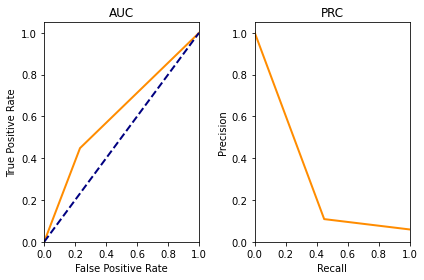

AUC: 60.85%, PRC: 29.47%


In [57]:
model = LogisticRegression()
model.fit(X_train_arr, y_train)
# model.coef_
y_pred = model.predict(X_test_arr)
evaluate_metrics(y_test, y_pred, show_plots = True)

#### svm (x)
- no weight but only predict prob 

              precision    recall  f1-score   support

       False       0.95      0.80      0.87     13057
        True       0.11      0.38      0.17       821

    accuracy                           0.77     13878
   macro avg       0.53      0.59      0.52     13878
weighted avg       0.90      0.77      0.83     13878



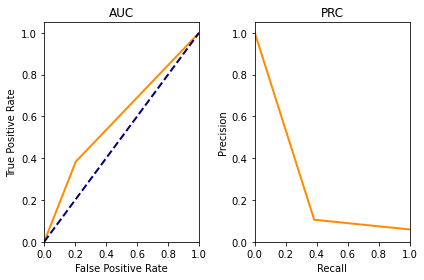

AUC: 58.97%, PRC: 26.29%


In [58]:
svm_clf = svm.LinearSVC(C=1)
svm_clf.fit(X_train_arr, y_train)
y_pred = svm_clf.predict(X_test_arr)
evaluate_metrics(y_test, y_pred, show_plots = True)

#### naive bayes
- $\theta_{yi}$ is the probability $P(x_i \mid y)$ of feature i appearing in a sample belonging to class y.

              precision    recall  f1-score   support

       False       0.96      0.74      0.84     13057
        True       0.10      0.47      0.17       821

    accuracy                           0.73     13878
   macro avg       0.53      0.61      0.50     13878
weighted avg       0.91      0.73      0.80     13878



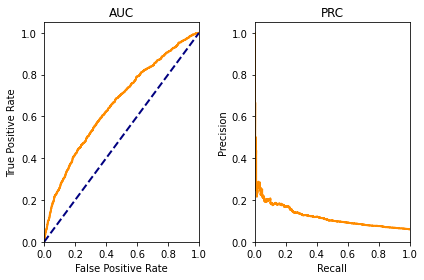

AUC: 65.76%, PRC: 12.10%


In [59]:
clf = MultinomialNB().fit(X_train_arr, y_train)
asset_prob = np.exp(clf.feature_log_prob_[0])
# clf.feature_log_prob_[0]
y_pred = (clf.predict_proba(X_test_arr))[:, 1]
evaluate_metrics(y_test, y_pred, show_plots = True)

### <font color=red>cross validation</font>
<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="300"/>

In [60]:
scores = cross_validate(clf, X_train_arr, y_train, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores["test_score"].mean(), scores["test_score"].std()))

0.79 accuracy with a standard deviation of 0.00


### Assign Weight
- conditional prob

In [61]:
# log p(w|c=1) + log p(w|c=0)
asset_prob = np.exp(clf.feature_log_prob_[0])

In [62]:
weights = pd.DataFrame([vectorizer.get_feature_names(), asset_prob.tolist()]).T
weights.columns = ["asset", "weight"]
# weights.sort_values(by="weight", ascending=False).style
# weights = weights[weights["weight"]>weights["weight"].mean()]

## Correlation

In [63]:
# mat2 = pd.DataFrame(np.hstack([y_train.reshape(-1,1), X_train_arr.toarray()]), columns=["y"]+vectorizer.get_feature_names())
# corr = mat2.corr().iloc[1:, 0:1].sort_values("y")
# corr.plot(kind="bar")
# corr

In [64]:
# corr.style.background_gradient(cmap='coolwarm', axis=None)

## Weight Rescaling
lowest level is 1, decide which one has higher importance score. start with 1

In [65]:
x = weights["weight"].astype(float)
x.describe()

count    11474.000000
mean         0.000087
std          0.000361
min          0.000006
25%          0.000012
50%          0.000020
75%          0.000043
max          0.009636
Name: weight, dtype: float64

### Three levels (prefer)

In [66]:
num_levels = 3
color_opts = ['lightskyblue', 'turquoise', 'orange', 'blue', 'red']

In [67]:
xx = pd.concat([weights["asset"], x, pd.cut(x, num_levels)], axis=1)
xx.columns = ["asset", "weight", "bins"]
xx["bins"] = xx["bins"].map(lambda x: f"[{str(x.left)}, {str(x.right)}]")
bin_dict = sorted(xx["bins"].unique().tolist())

colors = dict(zip(bin_dict, color_opts[0:num_levels]))
labels = dict(zip(bin_dict, range(1, len(bin_dict)+1)))

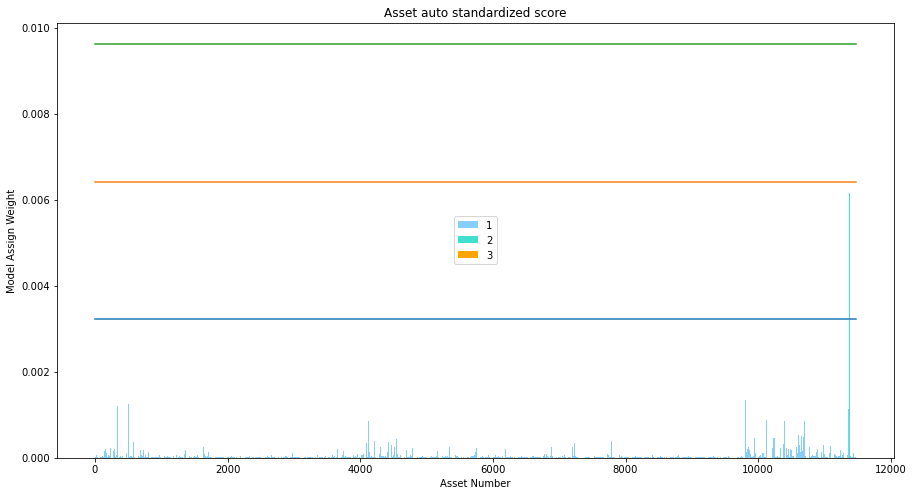

In [68]:
xx["color"] = xx["bins"].apply(lambda x: colors[x] if x in colors else "NA")
xx["auto_score"] = xx["bins"].apply(lambda x: labels[x] if x in colors else "NA")

plt.figure(figsize=(15,8))

for idx, item in xx.groupby("bins"):
    if item.shape[0] ==0:
        continue
    plt.bar(x=item.index, height = item["weight"], color=item["color"], label=item["auto_score"].iloc[0])

for pair in bin_dict:
    upper_line = eval(pair)[1]
    plt.plot([0, xx.index[-1]],[upper_line,upper_line])

    
plt.xlabel("Asset Number")
plt.ylabel("Model Assign Weight")
plt.title("Asset auto standardized score")
plt.legend()
plt.show()

In [69]:
xx[["asset", "auto_score"]]

,asset,auto_score
0,https://www.rockwellautomation.com/%20e300,1
1,https://www.rockwellautomation.com//404,1
2,https://www.rockwellautomation.com/22a3767f-56...,1
3,https://www.rockwellautomation.com/22da4f55-ff...,1
4,https://www.rockwellautomation.com/404,2
...,...,...
11469,https://www.rockwellautomation.com/training,1
11470,https://www.rockwellautomation.com/training/tr...,1
11471,https://www.rockwellautomation.com/webappng/si...,1
11472,https://www.rockwellautomation.com/webex,1


In [70]:
xx[xx["auto_score"]>1]

,asset,weight,bins,color,auto_score
4,https://www.rockwellautomation.com/404,0.006300,"[0.00322, 0.00643]",turquoise,2
44,https://www.rockwellautomation.com/capabilities,0.003559,"[0.00322, 0.00643]",turquoise,2
79,https://www.rockwellautomation.com/capabilitie...,0.008740,"[0.00643, 0.00964]",orange,3
254,https://www.rockwellautomation.com/capabilitie...,0.004135,"[0.00322, 0.00643]",turquoise,2
266,https://www.rockwellautomation.com/company/abo...,0.009620,"[0.00643, 0.00964]",orange,3
285,https://www.rockwellautomation.com/company/abo...,0.004977,"[0.00322, 0.00643]",turquoise,2
451,https://www.rockwellautomation.com/company/eve...,0.003220,"[0.00322, 0.00643]",turquoise,2
9803,https://www.rockwellautomation.com/products/ha...,0.003422,"[0.00322, 0.00643]",turquoise,2
10078,https://www.rockwellautomation.com/products/ha...,0.005162,"[0.00322, 0.00643]",turquoise,2
10148,https://www.rockwellautomation.com/products/ha...,0.004182,"[0.00322, 0.00643]",turquoise,2


### min-max Normalization

In [ ]:
x = weights["weight"].astype(float) 
x = (x-x.min())/(x.max()-x.min()) * 5
x.plot(kind="bar")

### z-score Standardization

In [ ]:
x = weights["weight"].astype(float) 
x = 1 + ((x-x.mean())/x.std())
x.plot(kind="bar")

## Others 

# Store model and prediction

In [ ]:
import pickle

In [ ]:
with open('model_v1.pkl','wb') as f:
    pickle.dump(clf, f)

In [ ]:
# load
with open('model_v1.pkl', 'rb') as f:
    clf2 = pickle.load(f)

## Prediction/Test with the latest month data

# Post to AEM

In [ ]:
# np.exp(clf2.feature_log_prob_[0])

# Checking